## Data Dictionary 

In [154]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [16]:
# Please import kid.csv
df = pd.read_csv('Kid.csv')
df_copy = df.copy()

Here are the variables that magazine reseller has on each customer from third-party sources:
Household Income (Income; rounded to the nearest $1,000.00)

Gender (IsFemale = 1 if the person is female, 0 otherwise)

Marital Status (IsMarried = 1 if married, 0 otherwise)

College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

Retired (IsRetired = 1 if retired, 0 otherwise)

Not employed (Unemployed = 1 if not employed, 0 otherwise)

Length of Residency in Current City (ResLength; in years)

Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

Home ownership (Own = 1 if own residence, 0 otherwise)

Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

Race (White = 1 if the race is white, 0 otherwise)

Language (English = 1 is the primary language in the household is English, 0 otherwise)

With this dataset, we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. At last, we’ll evaluate our model using the confusion matrix.

In [4]:
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [5]:
df.shape

(673, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 18 columns):
Obs No.             673 non-null int64
Buy                 673 non-null int64
Income              673 non-null int64
Is Female           673 non-null int64
Is Married          673 non-null int64
Has College         673 non-null int64
Is Professional     673 non-null int64
Is Retired          673 non-null int64
Unemployed          673 non-null int64
Residence Length    673 non-null int64
Dual Income         673 non-null int64
Minors              673 non-null int64
Own                 673 non-null int64
House               673 non-null int64
White               673 non-null int64
English             673 non-null int64
Prev Child Mag      673 non-null int64
Prev Parent Mag     673 non-null int64
dtypes: int64(18)
memory usage: 94.7 KB


In [8]:
df.describe()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
count,673.00000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,337.00000,0.185736,35078.751857,0.551263,0.349183,0.289747,0.341753,0.057949,0.031204,17.618128,0.231798,0.364042,0.362556,0.667162,0.692422,0.909361,0.071322,0.084695
std,194.42265,0.389182,23812.787498,0.497735,0.477066,0.453982,0.474650,0.233822,0.173997,13.555818,0.422294,0.481518,0.481096,0.471580,0.461834,0.287308,0.257554,0.278635
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.00000,0.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,337.00000,0.000000,32000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,505.00000,0.000000,52000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,673.00000,1.000000,75000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [18]:
df.columns

Index(['obs_no.', 'buy', 'income', 'is_female', 'is_married', 'has_college',
       'is_professional', 'is_retired', 'unemployed', 'residence_length',
       'dual_income', 'minors', 'own', 'house', 'white', 'english',
       'prev_child_mag', 'prev_parent_mag'],
      dtype='object')

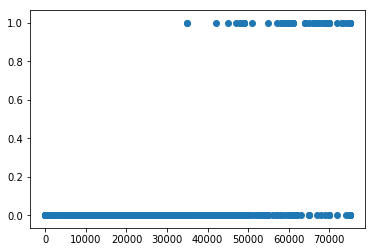

In [44]:
plt.scatter(df['income'], df['buy'])

In [57]:
df['own'].value_counts()

0    429
1    244
Name: own, dtype: int64

In [80]:
def binary_corr_plot(df, col1, col2):
    plt.scatter([0], [0], s=(np.where((df[col1] == 0) & (df[col2] == 0), 1, 0).sum())*25, c='blue')
    plt.scatter([1], [0], s=(np.where((df[col1] == 0) & (df[col2] == 1), 1, 0).sum())*25, c='blue')
    plt.scatter([0], [1], s=(np.where((df[col1] == 1) & (df[col2] == 0), 1, 0).sum())*25, c='blue')
    plt.scatter([1], [1], s=(np.where((df[col1] == 1) & (df[col2] == 1), 1, 0).sum())*25, c='blue')

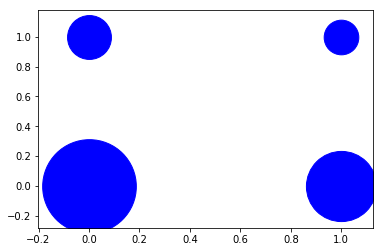

In [88]:
binary_corr_plot(df, 'buy', 'minors')

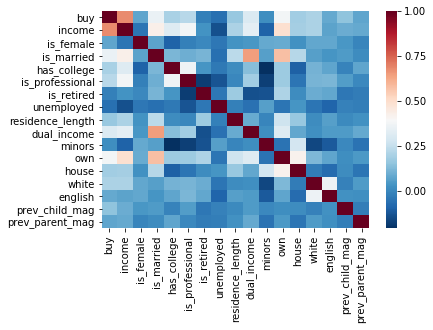

In [85]:
sns.heatmap(df[[x for x in df.columns if x not in ['obs_no.']]].corr(), cmap='RdBu_r')

In [92]:
df[[x for x in df.columns if x not in ['obs_no.']]].corr()['buy'].sort_values(ascending=False)

buy                 1.000000
income              0.679241
own                 0.378955
is_married          0.355479
dual_income         0.308080
is_professional     0.227822
white               0.202405
has_college         0.200299
house               0.183283
residence_length    0.163242
prev_child_mag      0.149717
english             0.084241
is_female           0.077529
prev_parent_mag     0.074282
minors              0.019811
is_retired         -0.020338
unemployed         -0.063738
Name: buy, dtype: float64

## Logistic Regression

In [198]:
#x = df[[x for x in df.columns if x not in ['obs_no.', 'buy']]]
x = df[['income', 'is_married']]
y = df['buy']

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [199]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
result = lr.fit(x_train, y_train)
result.C

1.0

In [201]:
y_pred = lr.predict(x_test)

In [202]:
confusion_matrix(y_test, y_pred)

array([[160,   2],
       [  8,  32]])

### Metrics

In [203]:
metrics.accuracy_score(y_test, y_pred)

0.9504950495049505

In [195]:
metrics.precision_score(y_test, y_pred)

0.9411764705882353

In [196]:
metrics.recall_score(y_test, y_pred)

0.8

In [197]:
metrics.f1_score(y_test, y_pred)

0.8648648648648648

## Logistic regression with cross-validation

In [125]:
from sklearn.linear_model import LogisticRegressionCV

In [141]:
lr_cv = LogisticRegressionCV(cv=5)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [143]:
model = lr_cv.fit(X_train, y_train)

In [204]:
y_pred2 = model.predict(X_test)

In [205]:
metrics.accuracy_score(y_test, y_pred2)

0.9504950495049505

In [206]:
metrics.precision_score(y_test, y_pred2)

0.9411764705882353

In [207]:
metrics.recall_score(y_test, y_pred2)

0.8

In [208]:
metrics.f1_score(y_test, y_pred2)

0.8648648648648648

## Logistic regression with cross-validation V2

In [163]:
y_pred_3 = cross_val_predict(LogisticRegression(), x, y, cv=5)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [164]:
metrics.accuracy_score(y, y_pred_3)


0.9227340267459139